<a href="https://colab.research.google.com/github/Hema5649/oasis_Tasks/blob/main/Customer_Segmentation_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd
print(marketing_data.isnull().sum())

Income                  0
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
Customer_Days           0
marital_Divorced        0
marital_Married         0
marital_Single          0
marital_Together        0
marital_Widow           0
education_2n Cycle      0
education_Basic         0
education_Graduation    0
education_Master        0
education_PhD           0
MntTotal                0
MntRegularProds         0
AcceptedCmpO

In [ ]:

data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 41 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,Cluster,TotalPurchases
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,...,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.00000,2205.000000,2205.000000
mean,51622.094785,0.442177,0.506576,49.009070,306.164626,26.403175,165.312018,37.756463,27.128345,44.057143,...,0.089796,0.024490,0.504762,0.165079,0.215873,562.764626,518.707483,0.29932,1.596825,606.821769
std,20713.063826,0.537132,0.544380,28.932111,337.493839,39.784484,217.784507,54.824635,41.130468,51.736211,...,0.285954,0.154599,0.500091,0.371336,0.411520,575.936911,553.847248,0.68044,1.188377,601.675284
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,-283.000000,0.00000,0.000000,5.000000
25%,35196.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,56.000000,42.000000,0.00000,0.000000,69.000000
50%,51287.000000,0.000000,0.000000,49.000000,178.000000,8.000000,68.000000,12.000000,8.000000,25.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,343.000000,288.000000,0.00000,2.000000,397.000000
75%,68281.000000,1.000000,1.000000,74.000000,507.000000,33.000000,232.000000,50.000000,34.000000,56.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,964.000000,884.000000,0.00000,3.000000,1047.000000
max,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,2491.000000,2458.000000,4.00000,3.000000,2525.000000


In [ ]:
columns = ['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Customer_Days', 'marital_Divorced', 'marital_Married',
       'marital_Single', 'marital_Together', 'marital_Widow',
       'education_2n Cycle', 'education_Basic', 'education_Graduation',
       'education_Master', 'education_PhD', 'MntTotal', 'MntRegularProds',
       'AcceptedCmpOverall']

mean_values = data[columns].mean()
median_values = data[columns].median()
mode_values = data[columns].mode()
std_values = data[columns].std()

print("Mean:")
print(mean_values)
print("\nMedian:")
print(median_values)
print("\nMode:")
print(mode_values)
print("\nStandard Deviation:")
print(std_values)

data['TotalPurchases'] = data['MntWines'] + data['MntFruits'] + data['MntMeatProducts'] + data['MntFishProducts'] + data['MntSweetProducts'] + data['MntGoldProds']
average_purchase_value = data['TotalPurchases'].mean()

purchase_categories = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
data['TotalPurchases'] = data[purchase_categories].sum(axis=1)
frequency_of_purchases = data['TotalPurchases'].mean()


average_purchase_per_category = data[purchase_categories].mean()
frequency_per_category = data[purchase_categories].apply(lambda x: x.sum() / len(data))
average_age = data['Age'].mean()
marital_status_proportion = data[['marital_Divorced', 'marital_Married', 'marital_Single', 'marital_Together', 'marital_Widow']].mean()
education_level_proportion = data[['education_2n Cycle', 'education_Basic', 'education_Graduation', 'education_Master', 'education_PhD']].mean()

print("Average Purchase Value:", average_purchase_value)
print("Frequency of Purchases:", frequency_of_purchases)
print("\nAverage Purchase Value for Each Product Category:")
print(average_purchase_per_category)
print("\nFrequency of Purchases for Each Product Category:")
print(frequency_per_category)
print("\nAverage Age of Customers:", average_age)
print("\nProportion of Customers in Each Marital Status Category:")
print(marital_status_proportion)
print("\nProportion of Customers in Each Education Level Category:")
print(education_level_proportion)


Mean:
Income                  51622.094785
Kidhome                     0.442177
Teenhome                    0.506576
Recency                    49.009070
MntWines                  306.164626
MntFruits                  26.403175
MntMeatProducts           165.312018
MntFishProducts            37.756463
MntSweetProducts           27.128345
MntGoldProds               44.057143
NumDealsPurchases           2.318367
NumWebPurchases             4.100680
NumCatalogPurchases         2.645351
NumStorePurchases           5.823583
NumWebVisitsMonth           5.336961
AcceptedCmp3                0.073923
AcceptedCmp4                0.074376
AcceptedCmp5                0.073016
AcceptedCmp1                0.064399
AcceptedCmp2                0.013605
Complain                    0.009070
Z_CostContact               3.000000
Z_Revenue                  11.000000
Response                    0.151020
Age                        51.095692
Customer_Days            2512.718367
marital_Divorced            0.10

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


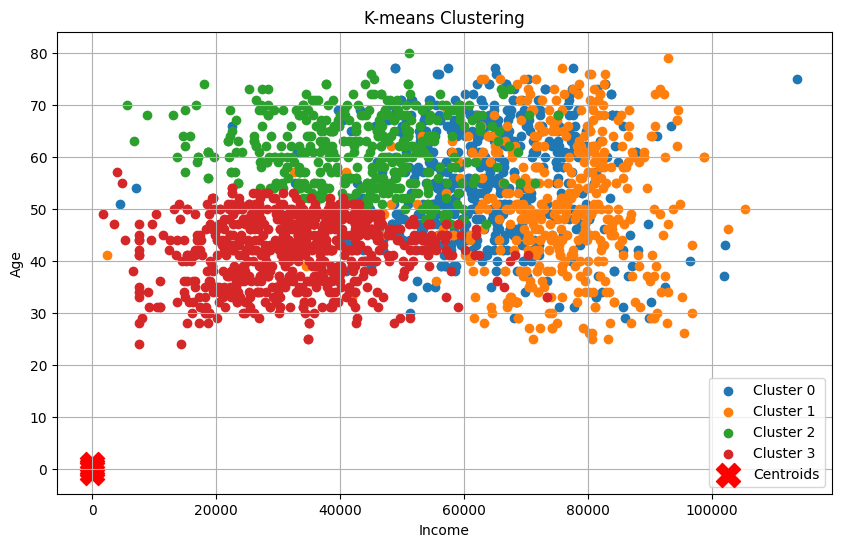

               Income   Kidhome  Teenhome    Recency    MntWines  MntFruits  \
Cluster                                                                       
0        63565.200698  0.190227  0.732984  47.748691  577.019197  21.743455   
1        75215.340564  0.062907  0.229935  50.039046  587.939262  82.383948   
2        42779.492274  0.523179  0.865342  50.766004   93.865342   6.858720   
3        32521.555710  0.835655  0.277159  48.245125   43.036212   6.509749   

         MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
Cluster                                                                     
0             182.122164        32.371728         30.588133     63.633508   
1             485.305857       115.733189         74.334056     79.780911   
2              35.673289         9.858720          7.134658     22.430464   
3              28.232591         9.589136          6.672702     19.142061   

         ...  marital_Together  marital_Widow  education_2n Cy

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Select relevant features for clustering
features = ['Income', 'Age', 'NumWebPurchases', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts']

# Prepare feature matrix
X = data[features]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train K-means clustering algorithm with the optimal number of clusters
k = 4  # Example: Optimal number of clusters
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
kmeans.fit(X_scaled)

# Assign cluster labels to the original data
data['Cluster'] = kmeans.labels_

# Visualize the clusters
plt.figure(figsize=(10, 6))
for cluster in range(k):
    cluster_data = data[data['Cluster'] == cluster]
    plt.scatter(cluster_data['Income'], cluster_data['Age'], label=f'Cluster {cluster}')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids', marker='X')
plt.xlabel('Income')
plt.ylabel('Age')
plt.title('K-means Clustering')
plt.legend()
plt.grid(True)
plt.show()

# Analyze and interpret the clusters
cluster_means = data.groupby('Cluster').mean()
print(cluster_means)


In [ ]:
segment_analysis = customer_data.groupby('Cluster').agg({
    'Income': 'mean',
    'MntWines': 'mean',
    'MntFruits': 'mean',
})
for segment, data in segment_analysis.iterrows():
    print(f"\nInsights and Recommendations for Segment {segment}:")
    print("Average Income:", data['Income'])
    print("Average Spending on Wines:", data['MntWines'])
    print("Average Spending on Fruits:", data['MntFruits'])
    if data['Income'] > 60000:
        print("Recommendation: Offer premium wine selections to this segment.")
    elif data['Income'] < 40000:
        print("Recommendation: Provide discounts or promotions to attract more customers in this segment.")
    else:
        print("Recommendation: Focus on improving customer engagement and loyalty programs.")


Insights and Recommendations for Segment 0:
Average Income: 60000.0
Average Spending on Wines: 125.0
Average Spending on Fruits: 45.0
Recommendation: Focus on improving customer engagement and loyalty programs.

Insights and Recommendations for Segment 1:
Average Income: 57500.0
Average Spending on Wines: 250.0
Average Spending on Fruits: 45.0
Recommendation: Focus on improving customer engagement and loyalty programs.

Insights and Recommendations for Segment 2:
Average Income: 42500.0
Average Spending on Wines: 75.0
Average Spending on Fruits: 25.0
Recommendation: Focus on improving customer engagement and loyalty programs.


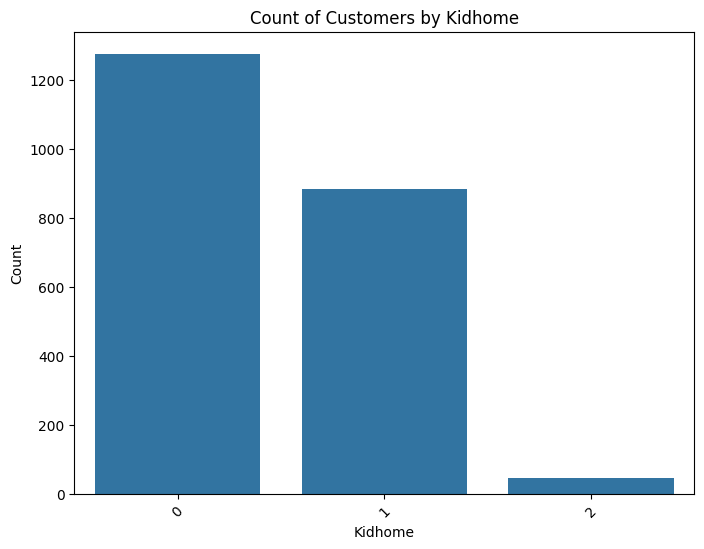

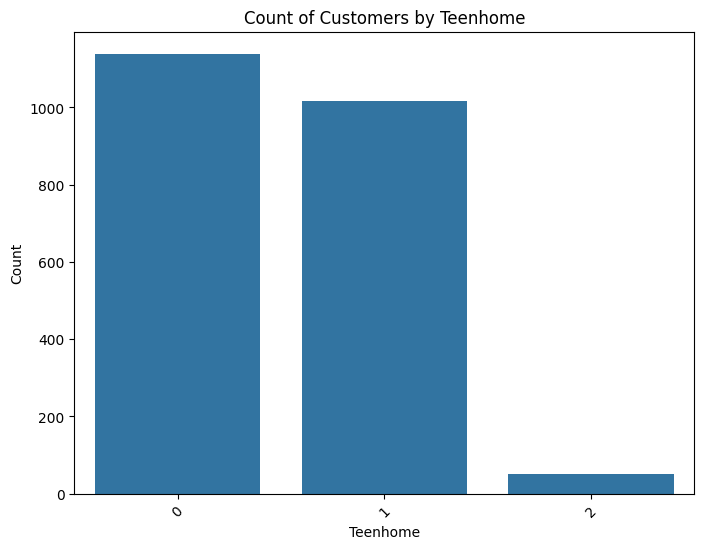

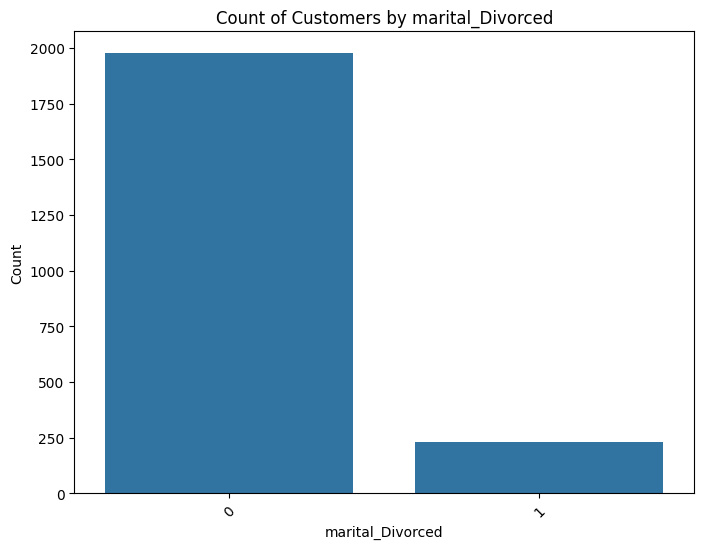

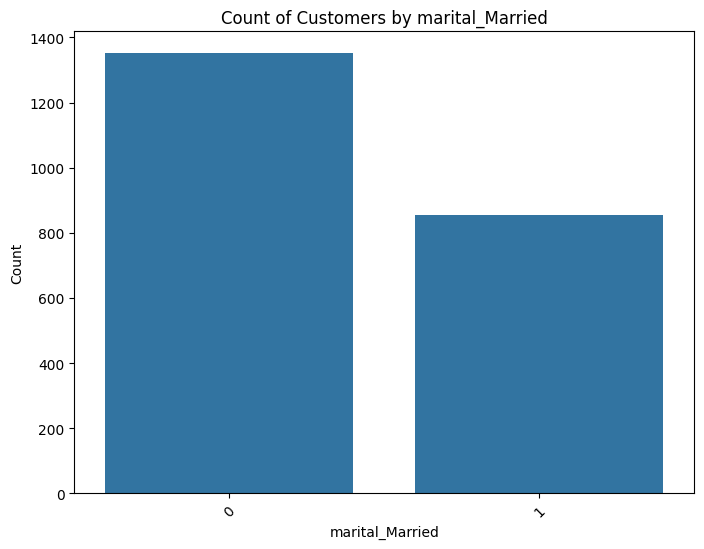

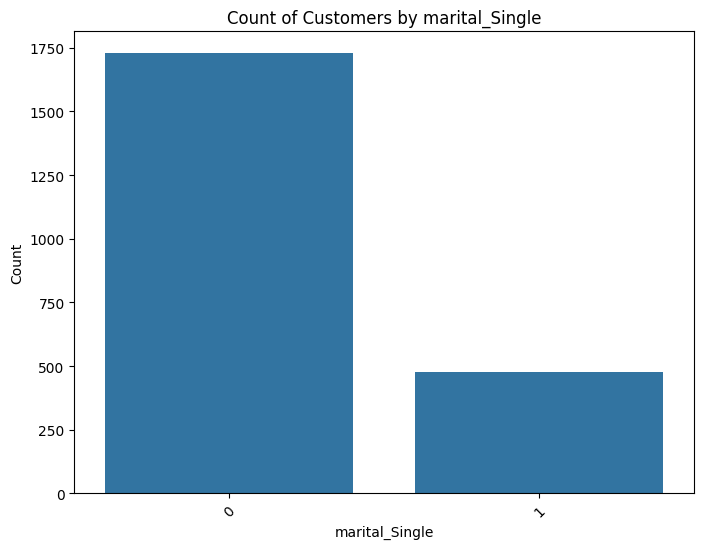

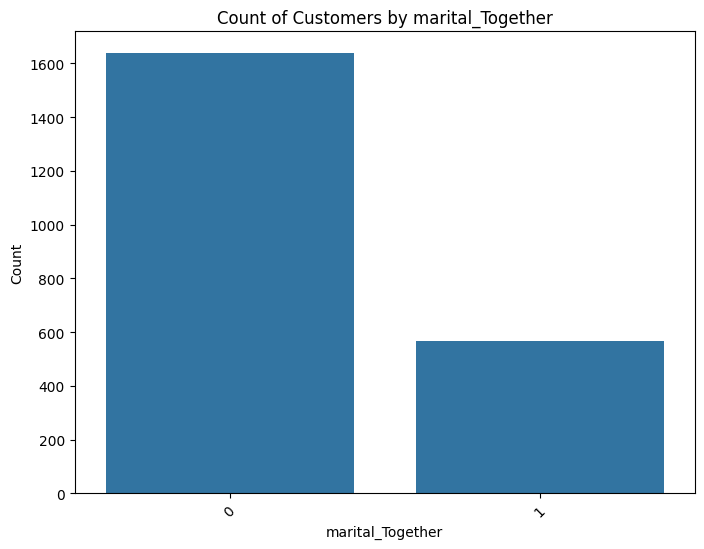

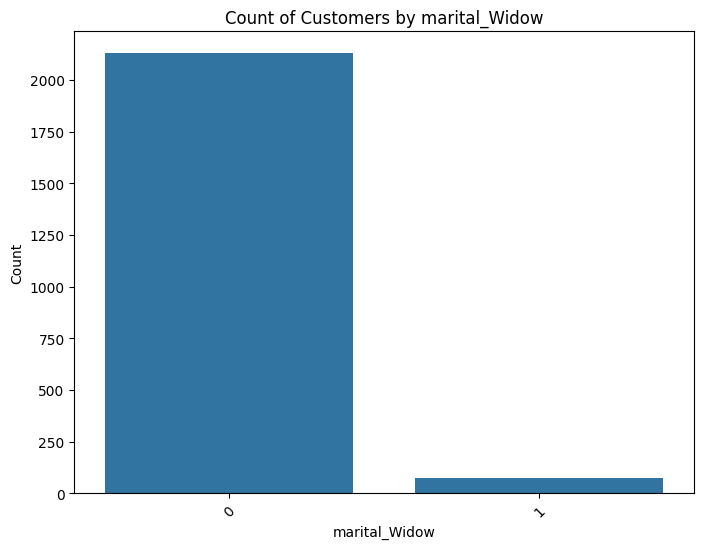

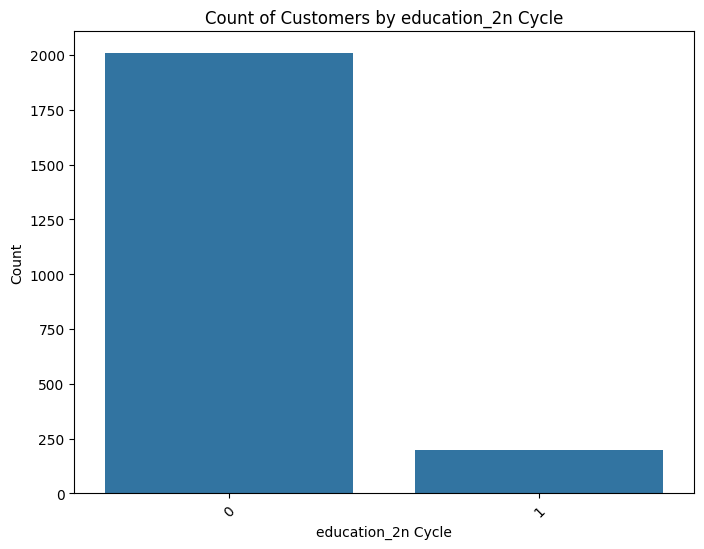

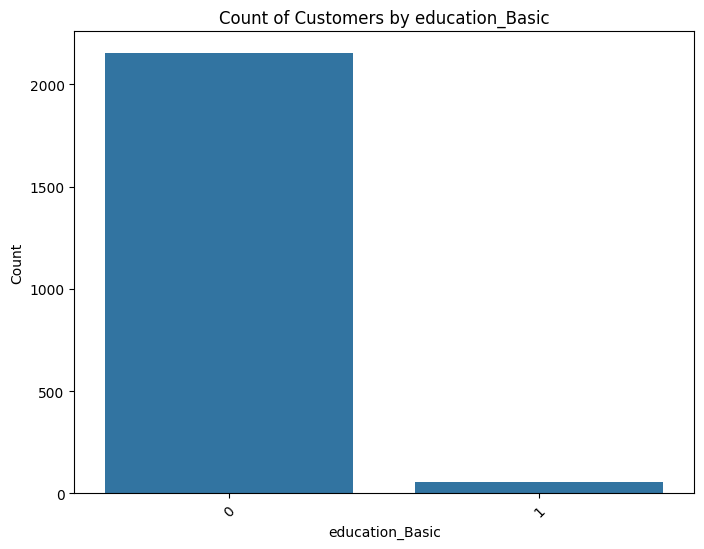

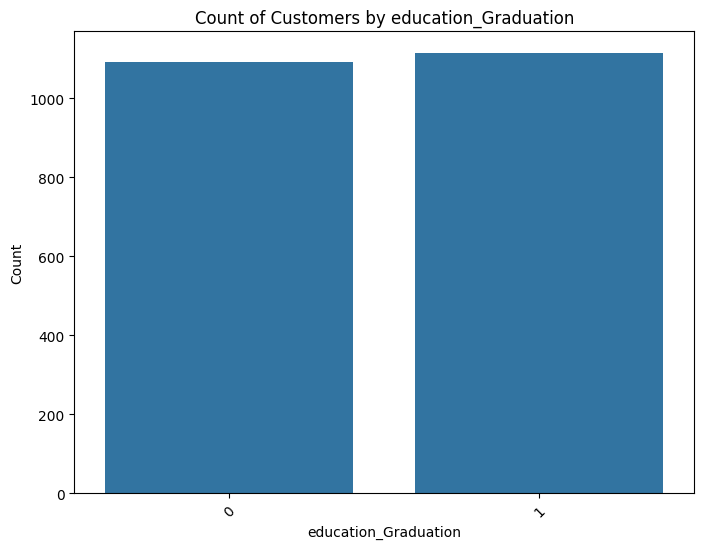

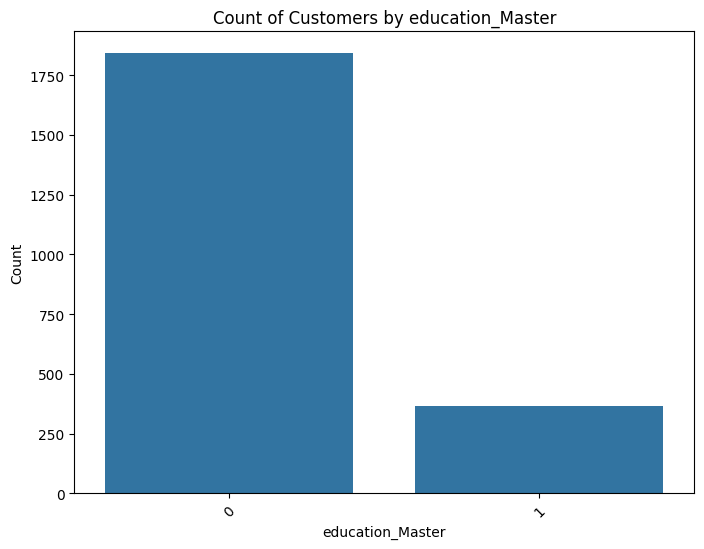

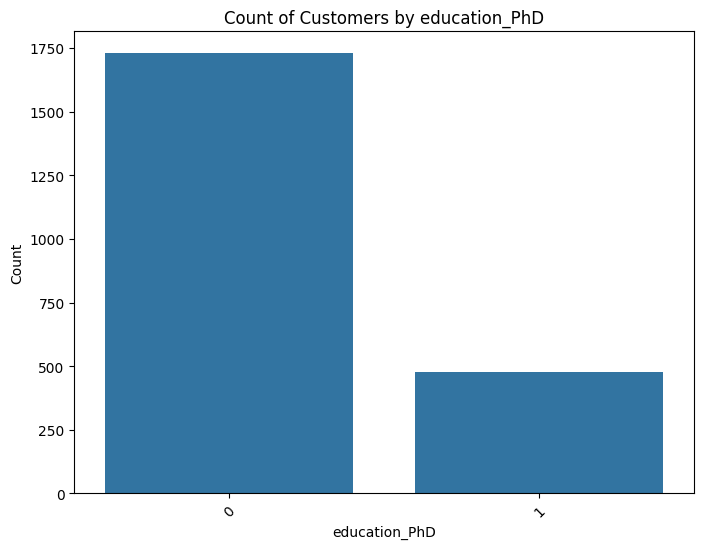

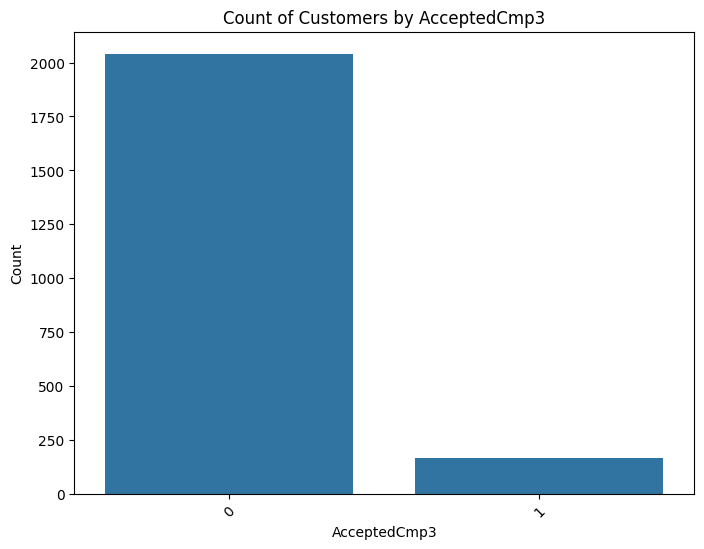

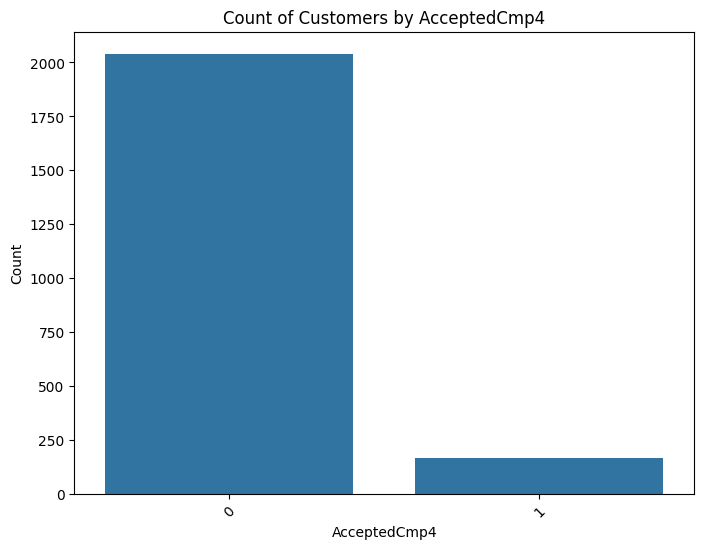

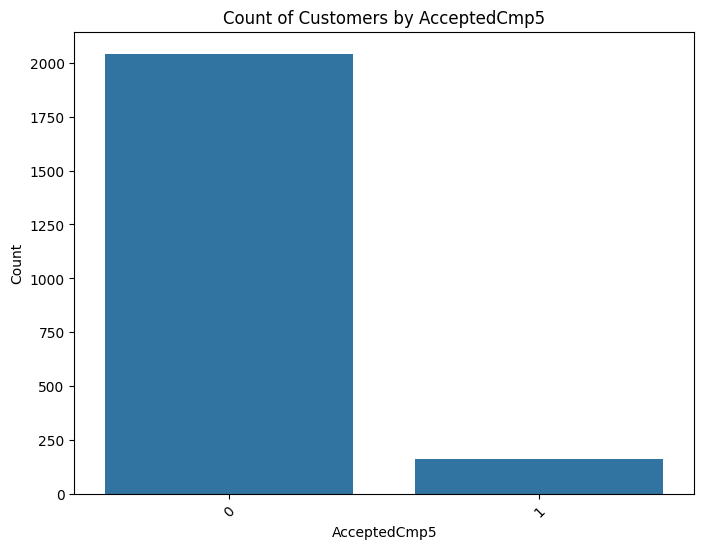

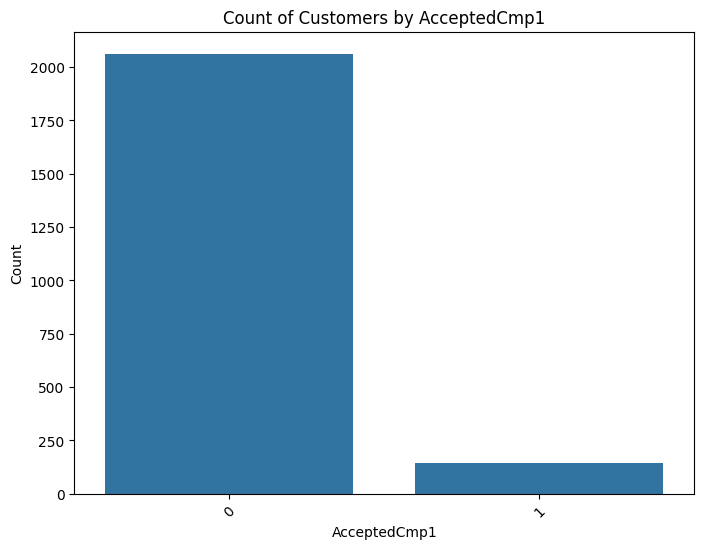

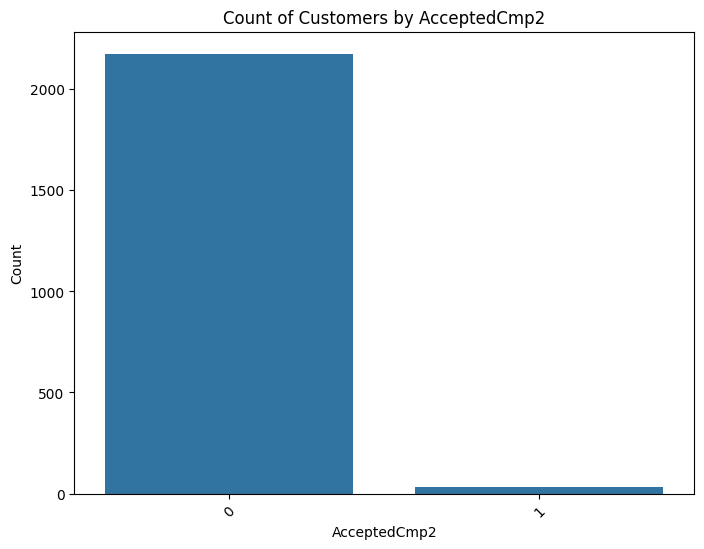

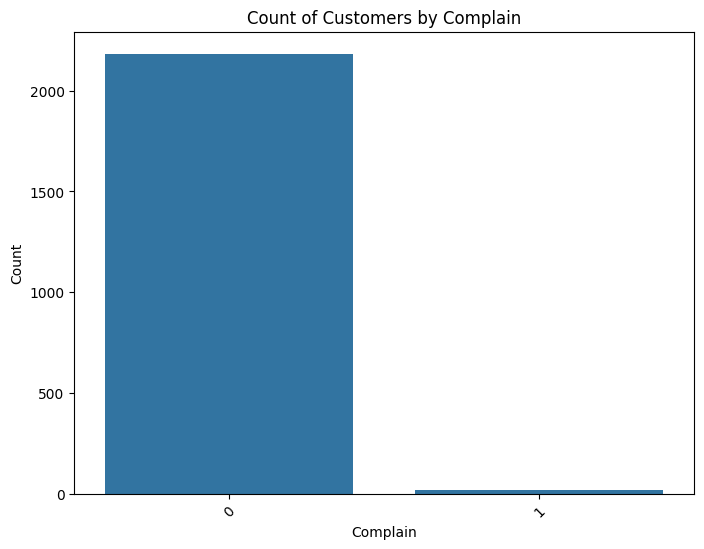

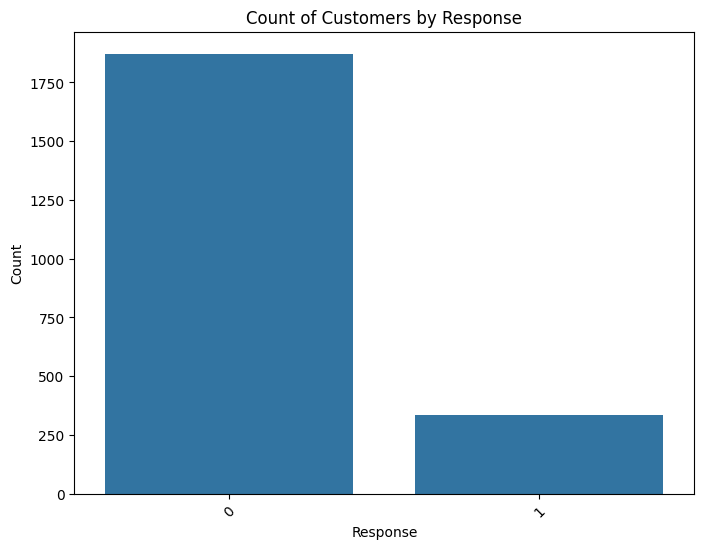

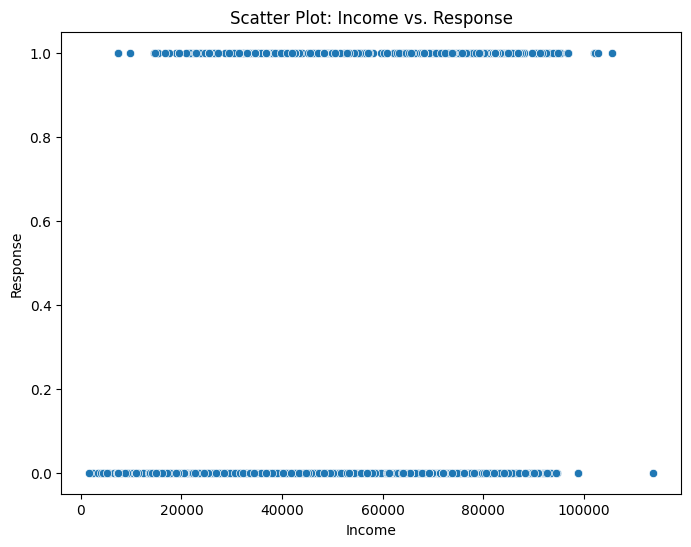

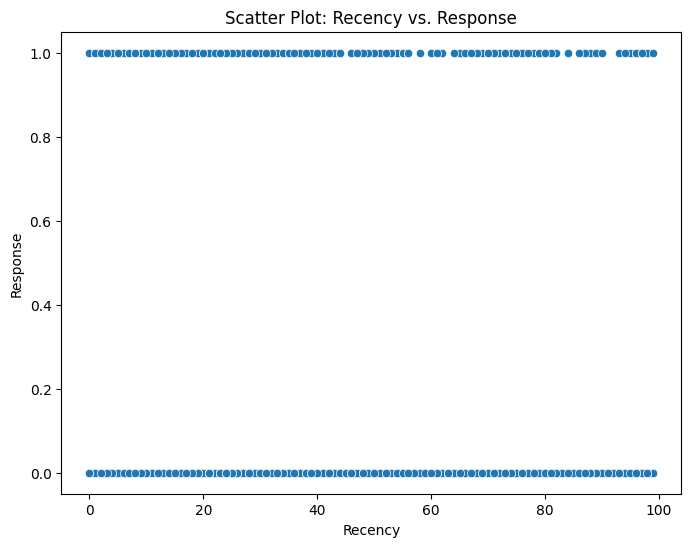

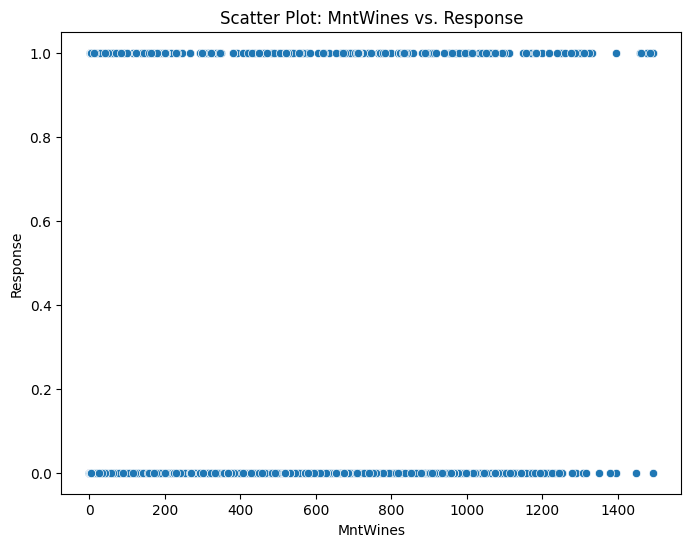

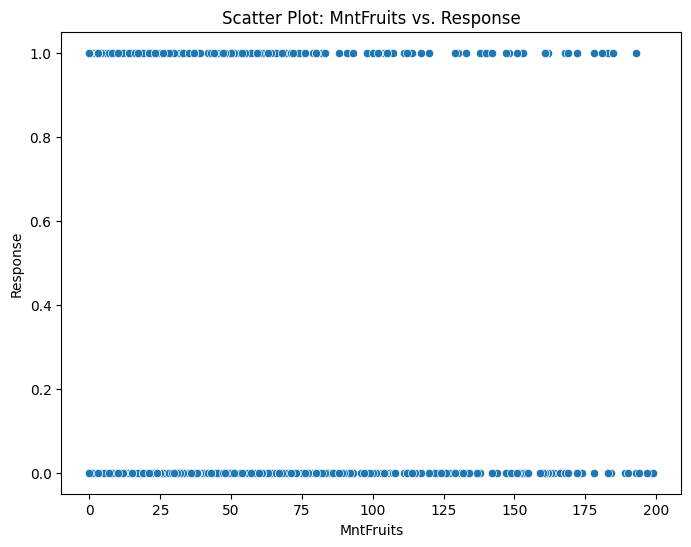

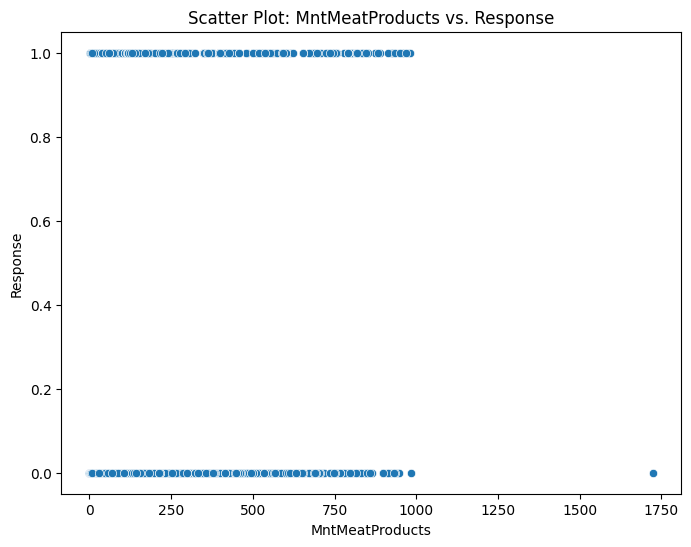

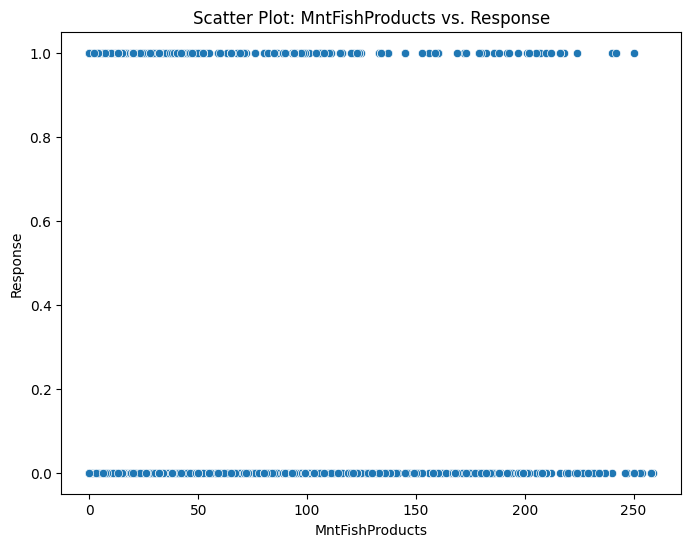

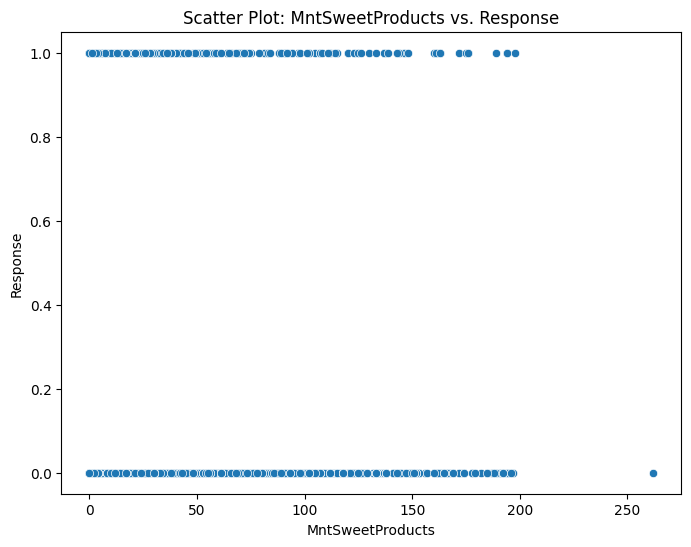

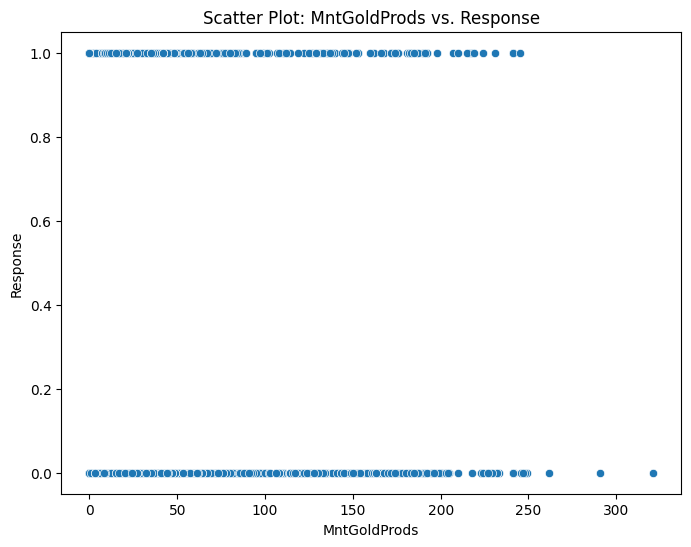

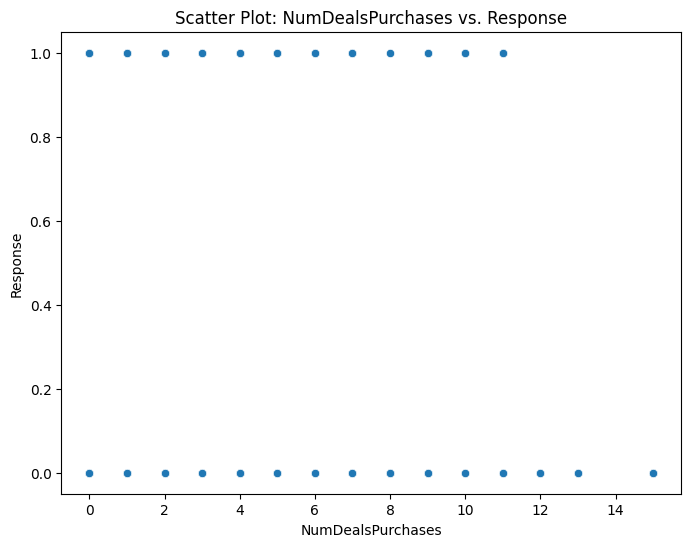

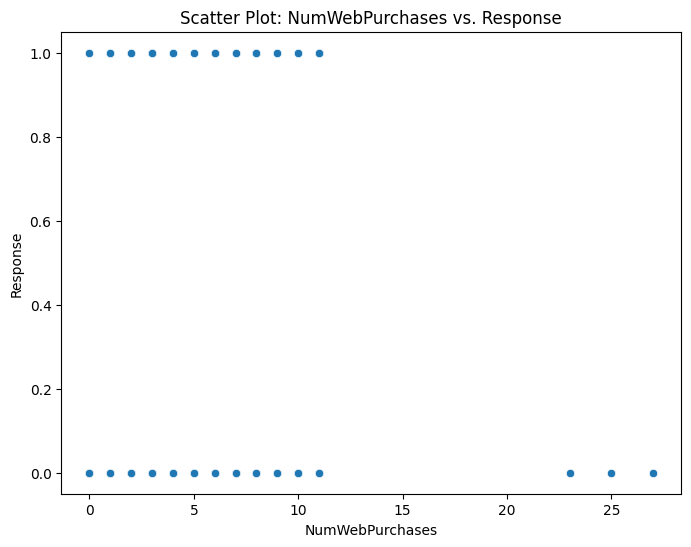

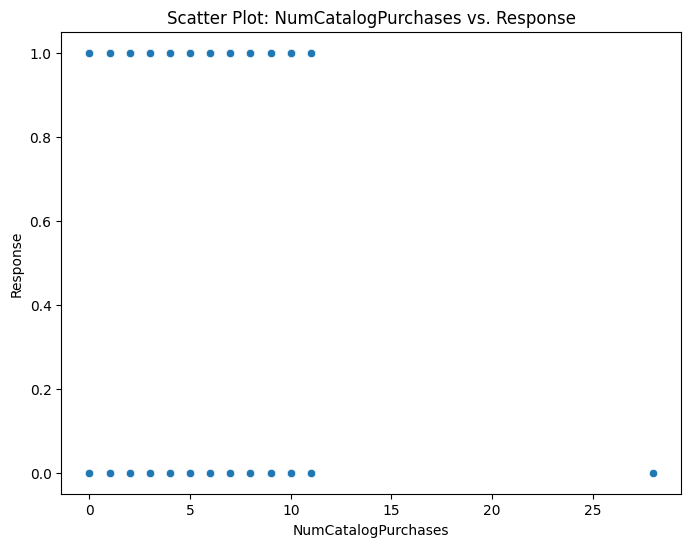

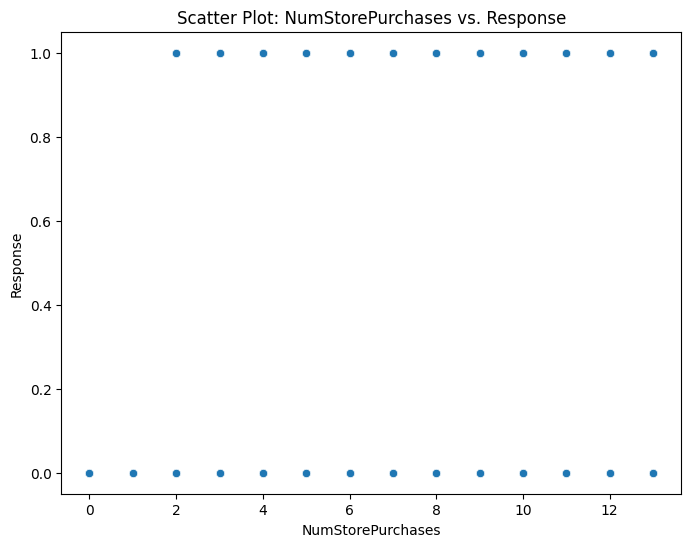

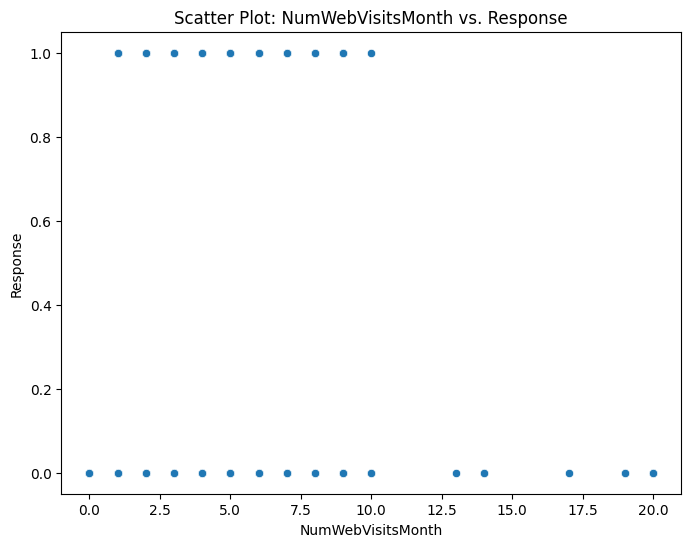

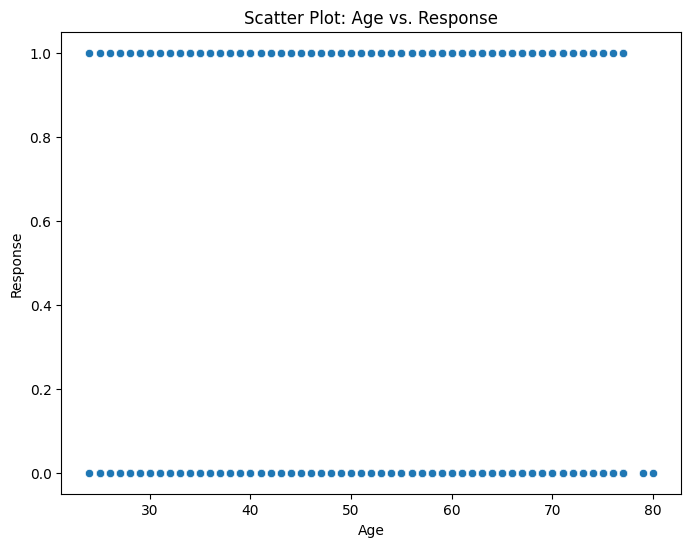

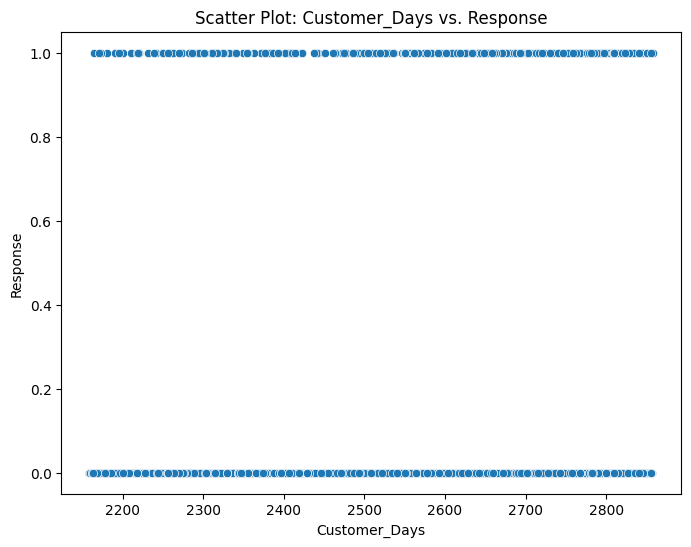

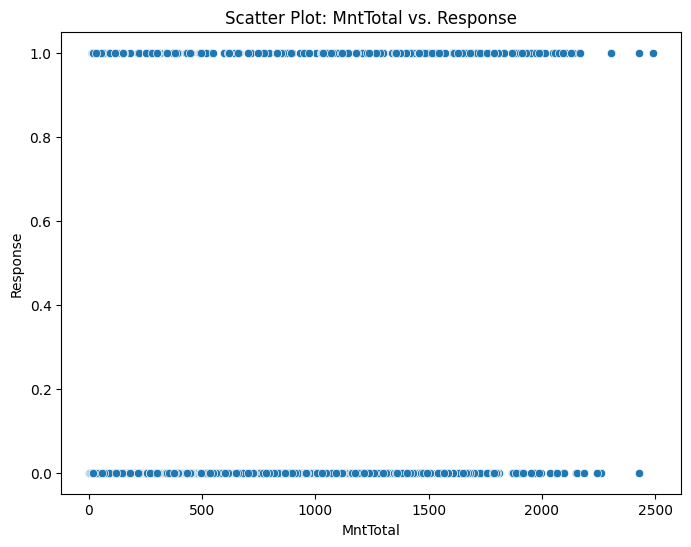

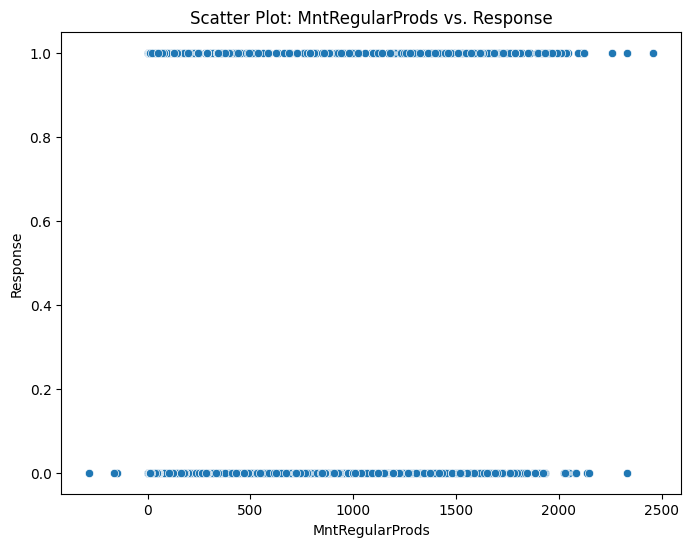

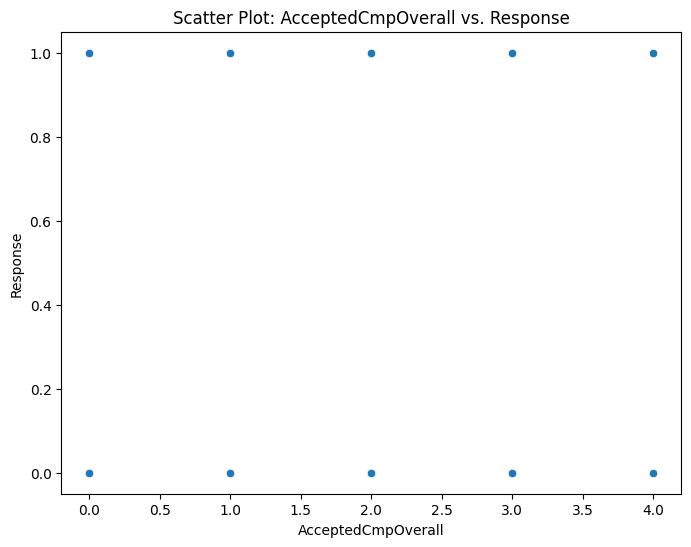

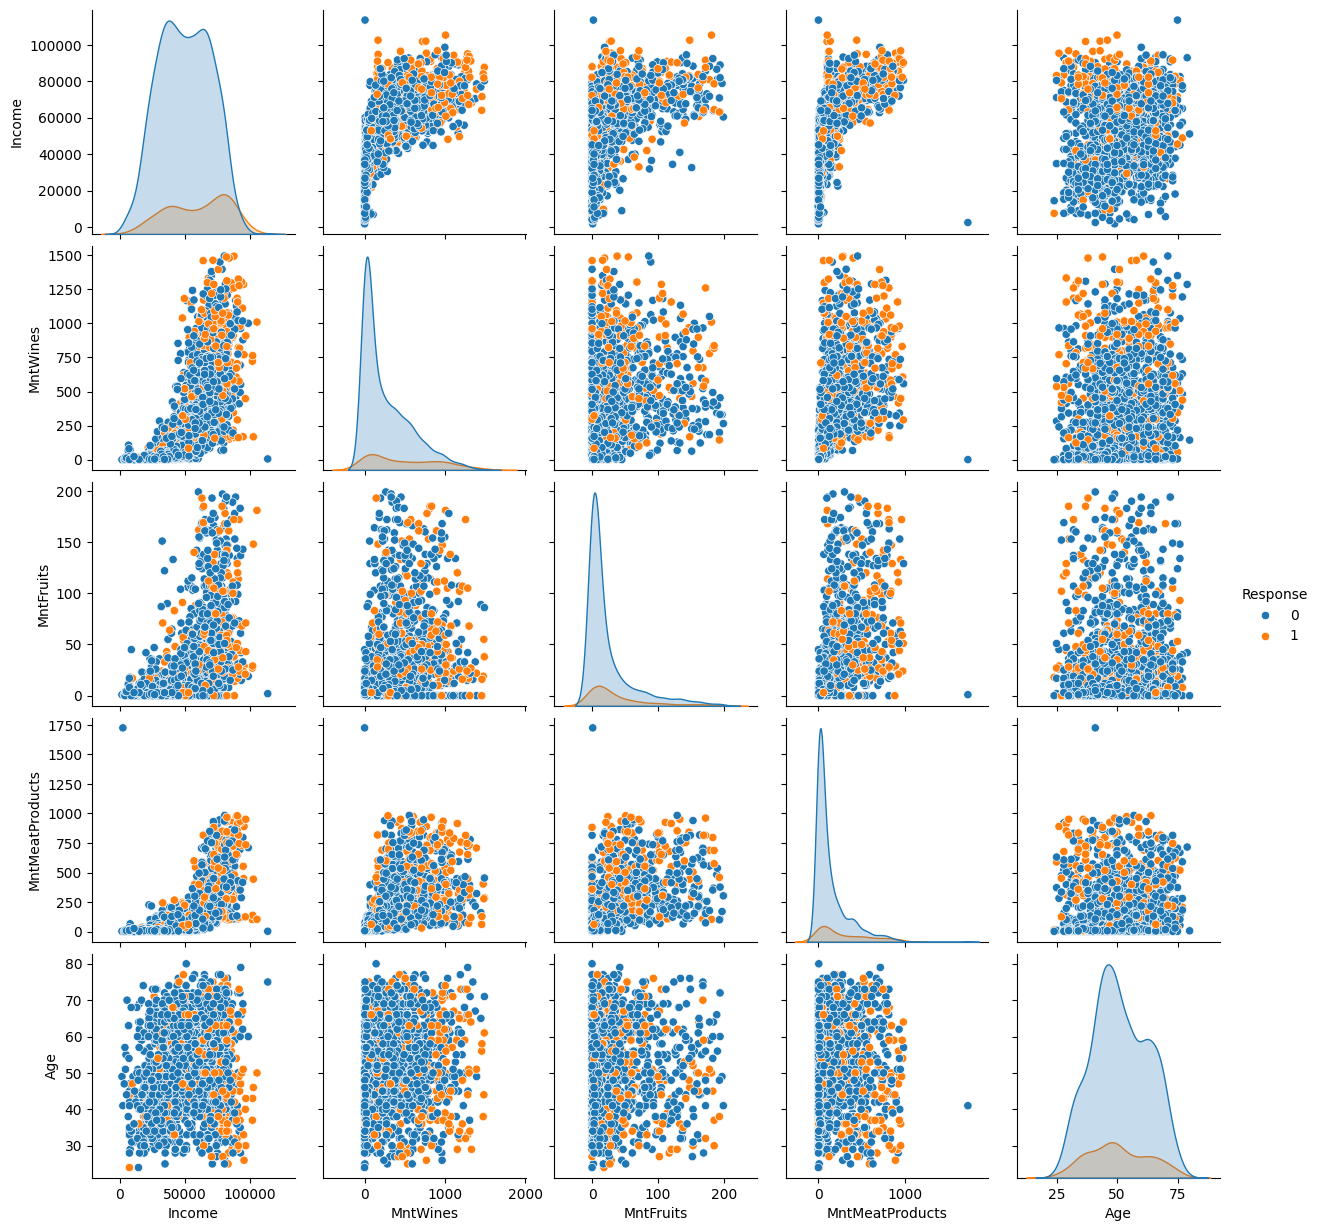

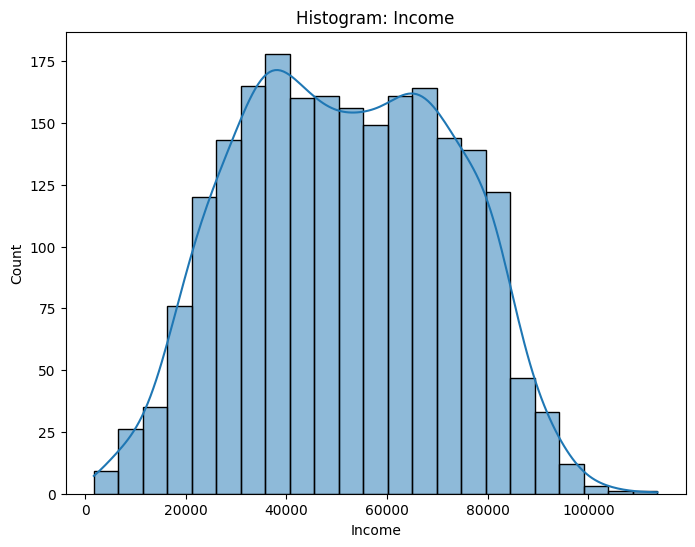

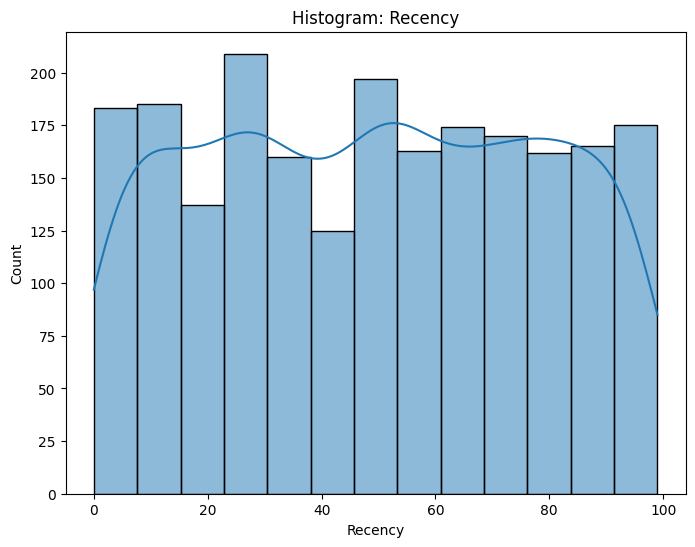

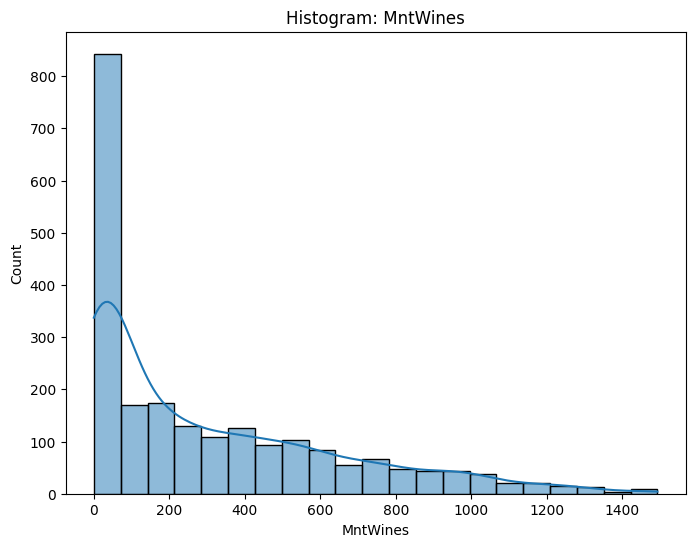

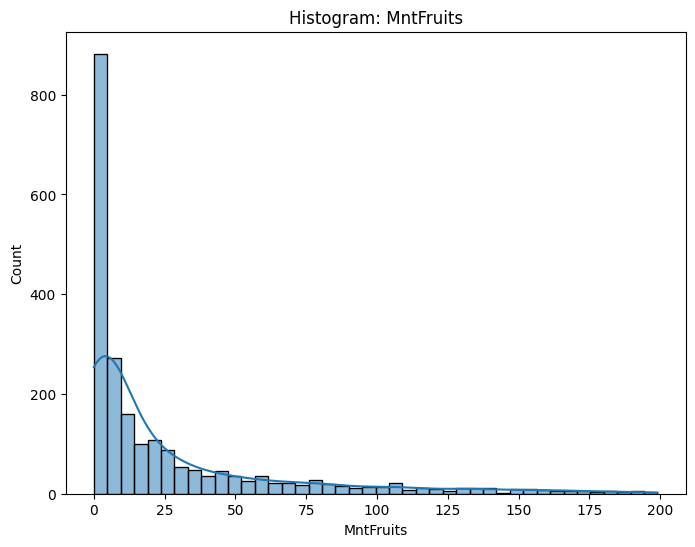

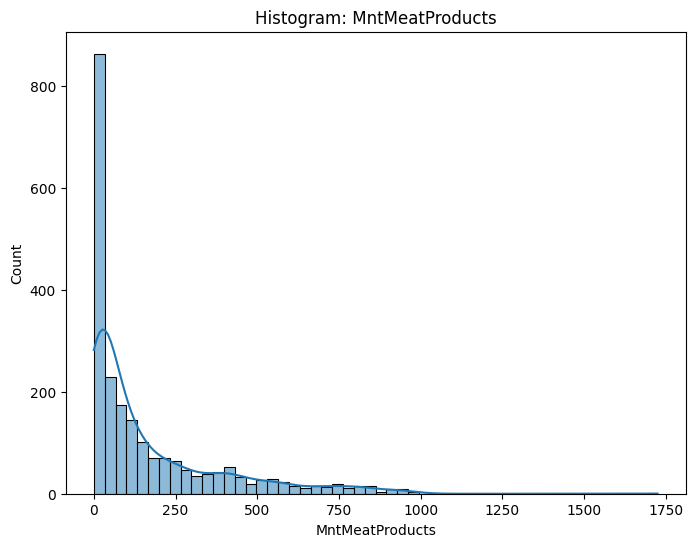

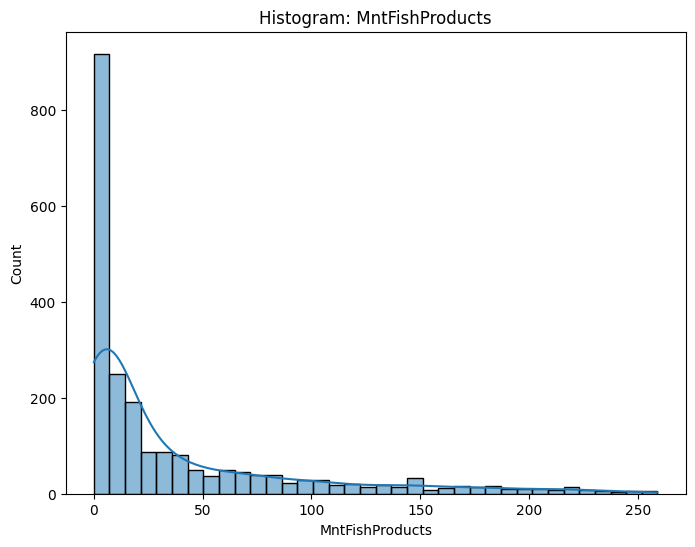

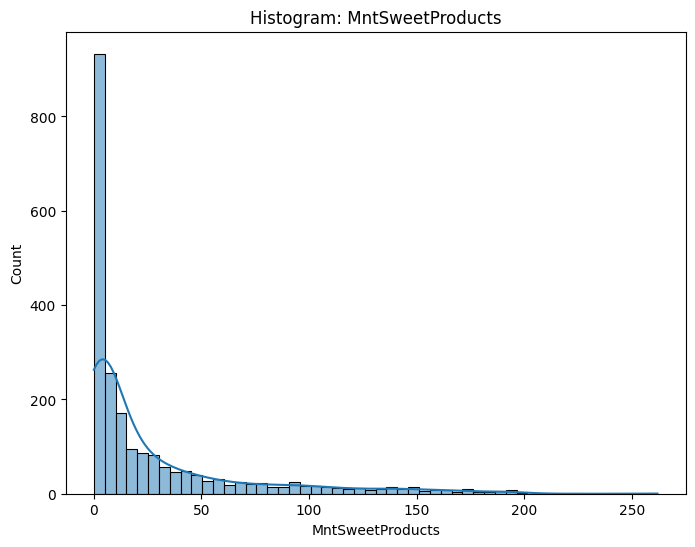

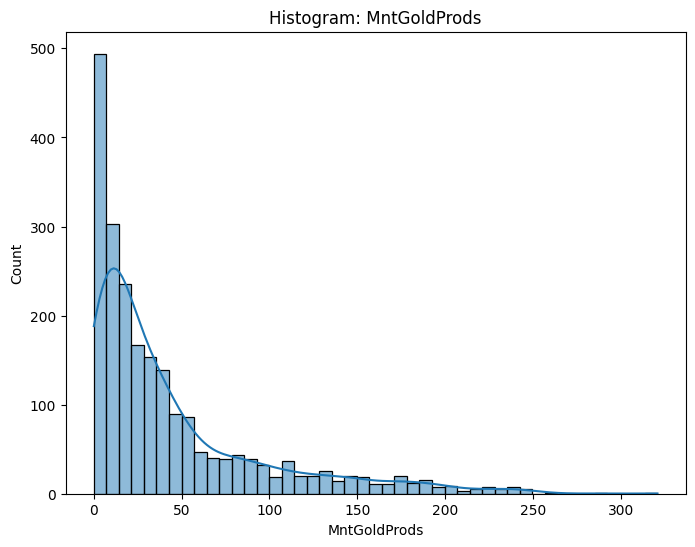

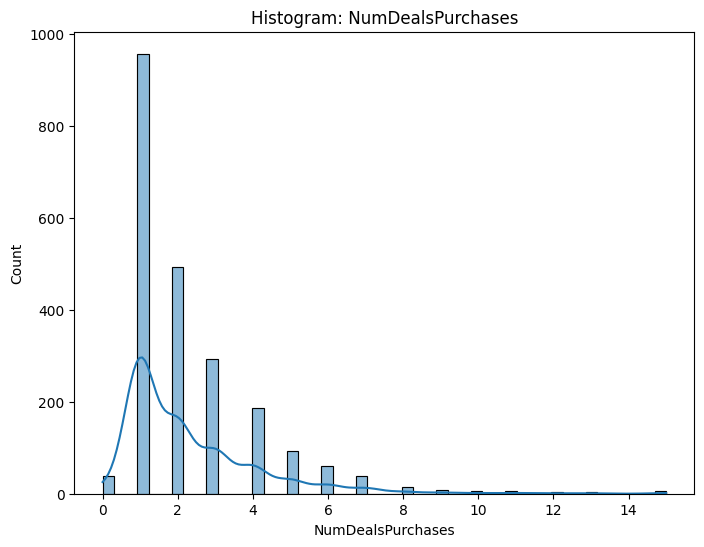

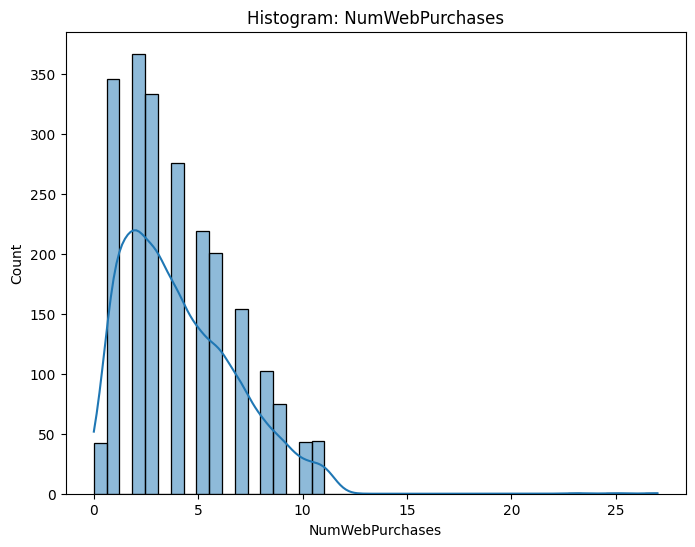

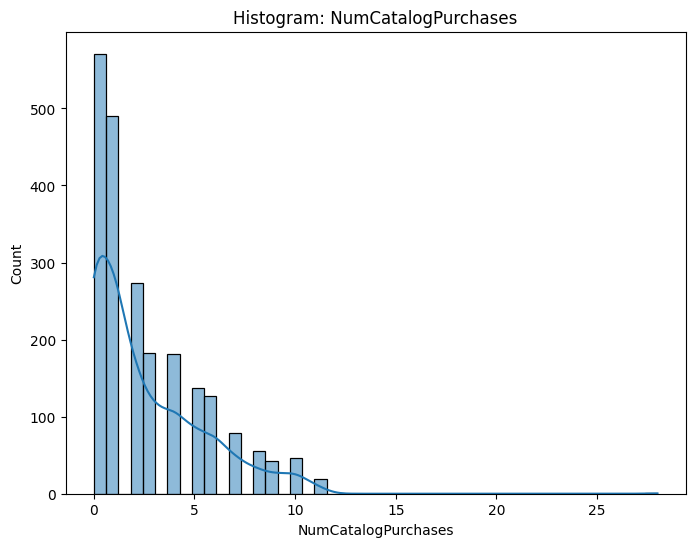

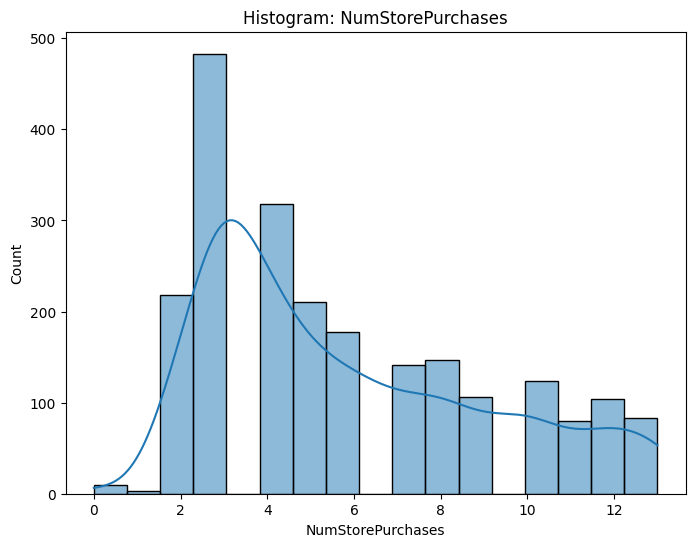

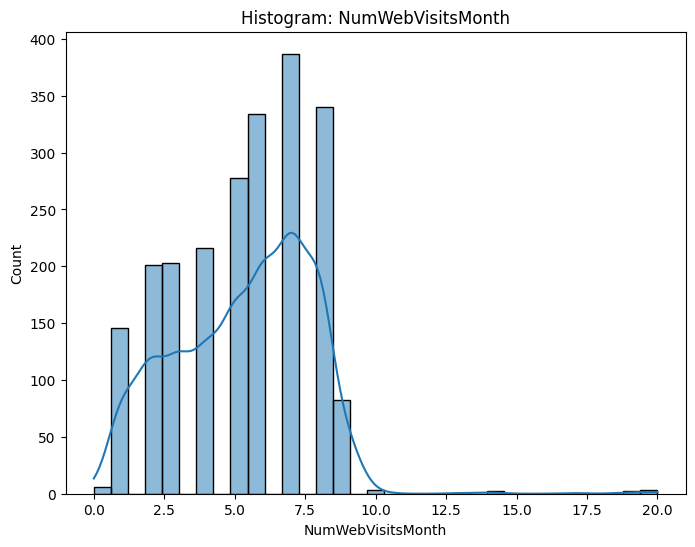

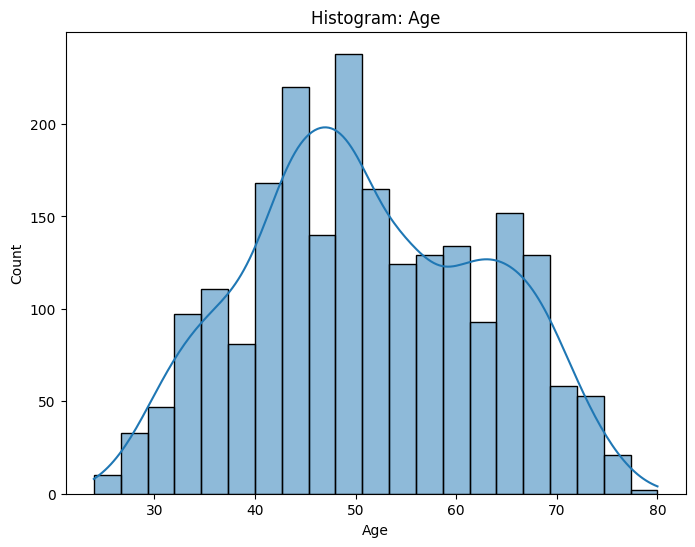

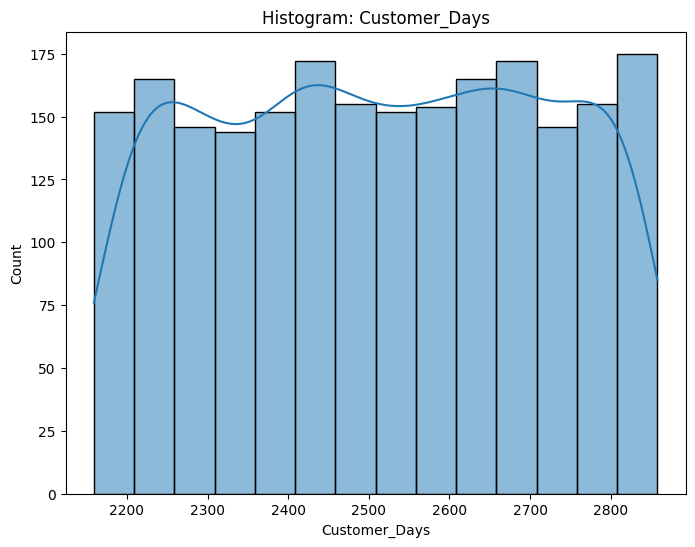

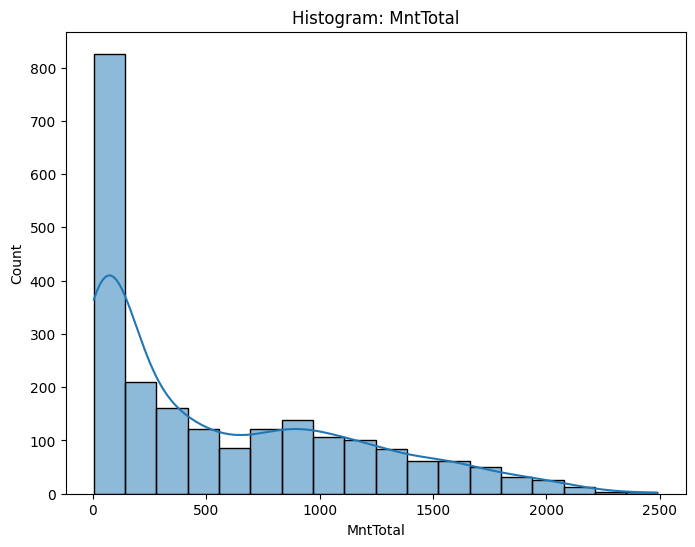

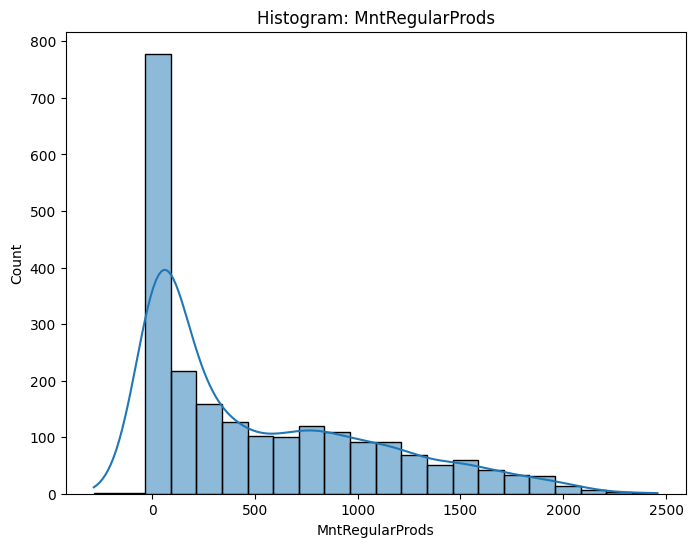

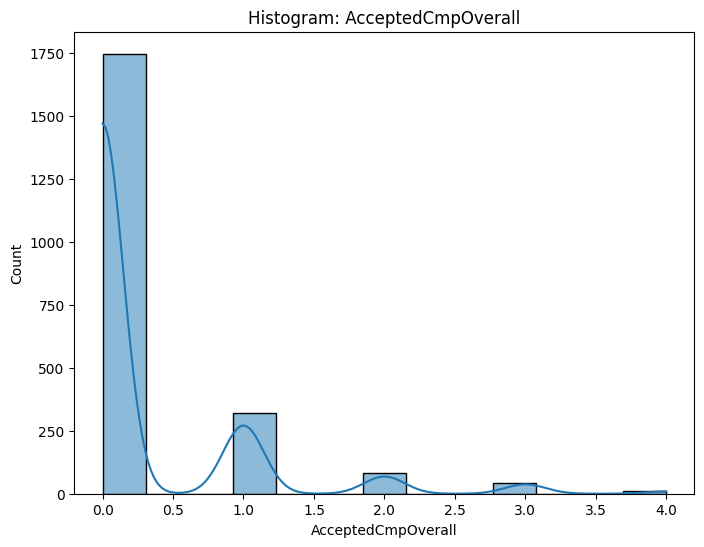

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the data
data = pd.read_csv('/content/ifood_df (1).csv')

# Select columns for analysis
selected_columns = ['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
                    'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
                    'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
                    'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
                    'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
                    'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
                    'Age', 'Customer_Days', 'marital_Divorced', 'marital_Married',
                    'marital_Single', 'marital_Together', 'marital_Widow',
                    'education_2n Cycle', 'education_Basic', 'education_Graduation',
                    'education_Master', 'education_PhD', 'MntTotal', 'MntRegularProds',
                    'AcceptedCmpOverall']

# Bar chart for categorical variables
categorical_columns = ['Kidhome', 'Teenhome', 'marital_Divorced', 'marital_Married',
                       'marital_Single', 'marital_Together', 'marital_Widow',
                       'education_2n Cycle', 'education_Basic', 'education_Graduation',
                       'education_Master', 'education_PhD', 'AcceptedCmp3', 'AcceptedCmp4',
                       'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response']
for column in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=data, x=column)
    plt.title(f'Count of Customers by {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

# Scatter plots for numerical variables
numerical_columns = ['Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
                     'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
                     'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
                     'NumStorePurchases', 'NumWebVisitsMonth', 'Age', 'Customer_Days',
                     'MntTotal', 'MntRegularProds', 'AcceptedCmpOverall']
for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=data, x=column, y='Response')
    plt.title(f'Scatter Plot: {column} vs. Response')
    plt.xlabel(column)
    plt.ylabel('Response')
    plt.show()

# Pairplot for selected attributes
selected_attributes = ['Income', 'MntWines', 'MntFruits', 'MntMeatProducts', 'Age', 'Response']
sns.pairplot(data[selected_attributes], hue='Response')
plt.show()

# Histograms for numerical variables
for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=data, x=column, kde=True)
    plt.title(f'Histogram: {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()


In [ ]:
print("\nInsights and Recommendations:")
print("- Identify customer segments with high purchasing power and target them with premium products.")
print("- Analyze seasonal trends in purchasing behavior and adjust marketing strategies accordingly.")
print("- Implement customer retention programs to increase loyalty and repeat purchases.")


Insights and Recommendations:
- Identify customer segments with high purchasing power and target them with premium products.
- Analyze seasonal trends in purchasing behavior and adjust marketing strategies accordingly.
- Implement customer retention programs to increase loyalty and repeat purchases.
